In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import pylab

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [60]:
aircraft = pd.read_csv("C:/Users/KIIT/Downloads/train.csv")

In [3]:
aircraft.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [61]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
aircraft['Severity']= label_encoder.fit_transform(aircraft['Severity'])

In [75]:
aircraft.corr()['Severity']

Severity                   1.000000
Safety_Score               0.205276
Days_Since_Inspection      0.001858
Total_Safety_Complaints    0.010642
Control_Metric            -0.000930
Turbulence_In_gforces      0.035977
Cabin_Temperature         -0.008819
Accident_Type_Code         0.212203
Max_Elevation              0.005572
Violations                 0.026349
Adverse_Weather_Metric    -0.153946
Accident_ID               -0.008583
Name: Severity, dtype: float64

In [6]:
aircraft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null int32
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int32(1), int64(5)
memory usage: 898.6 KB


In [7]:
aircraft.describe()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,1.410400,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,1.182249,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,0.000000,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,1.000000,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,3.000000,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,3.000000,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


In [8]:
def masterplot(data,col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(data[col])
    
    plt.subplot(1,3,2)
    stats.probplot(data[col],dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=data[col])
    
def log_master(data,col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(np.log(data[col]))
    
    plt.subplot(1,3,2)
    stats.probplot(np.log(data[col]),dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=np.log(data[col]))
    
def reciprocal_master(data,col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(1/data[col])
    
    plt.subplot(1,3,2)
    stats.probplot(1/data[col],dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=1/data[col])
    

def squareroot_master(data,col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(np.sqrt(data[col]))
    
    plt.subplot(1,3,2)
    stats.probplot(np.sqrt(data[col]),dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=np.sqrt(data[col]))
    

def exponential_master(data,col,e):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(data[col]**e)
    
    plt.subplot(1,3,2)
    stats.probplot(data[col]**e,dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=data[col]**e)
    
def boxcox_master(data, col):
    plt.figure(figsize=(16, 4))
    plt.tight_layout()

    z,param=stats.boxcox(data[col])
    
    plt.subplot(1, 3, 1)
    sns.distplot(z, bins=30)
    plt.title('Box-Cox Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(z, dist="norm", plot=pylab)
    plt.ylabel('Box-Cox RM quantiles')

    plt.subplot(1, 3, 3)
    sns.boxplot(y=z)
    plt.title('Box-Cox Boxplot')


In [120]:
training, testing = train_test_split(aircraft, test_size=0.2, random_state=0)
print("Total sample size = %i; training sample size = %i, testing sample size = %i"\
     %(aircraft.shape[0],training.shape[0],testing.shape[0]))

Total sample size = 10000; training sample size = 8000, testing sample size = 2000


In [121]:
train = training.loc[:,aircraft.columns]
test = testing.loc[:,aircraft.columns]

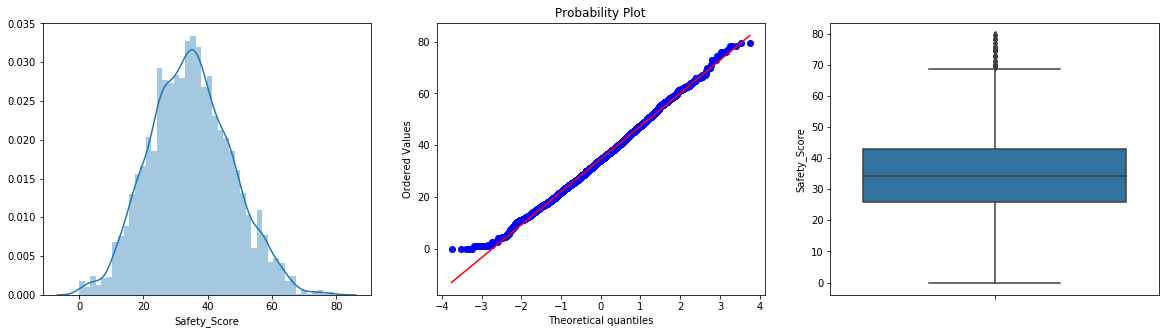

In [123]:
exponential_master(train,'Safety_Score',0.95)

In [124]:
train['Safety_Score'] = train['Safety_Score']**0.95
test['Safety_Score'] = test['Safety_Score']**0.95

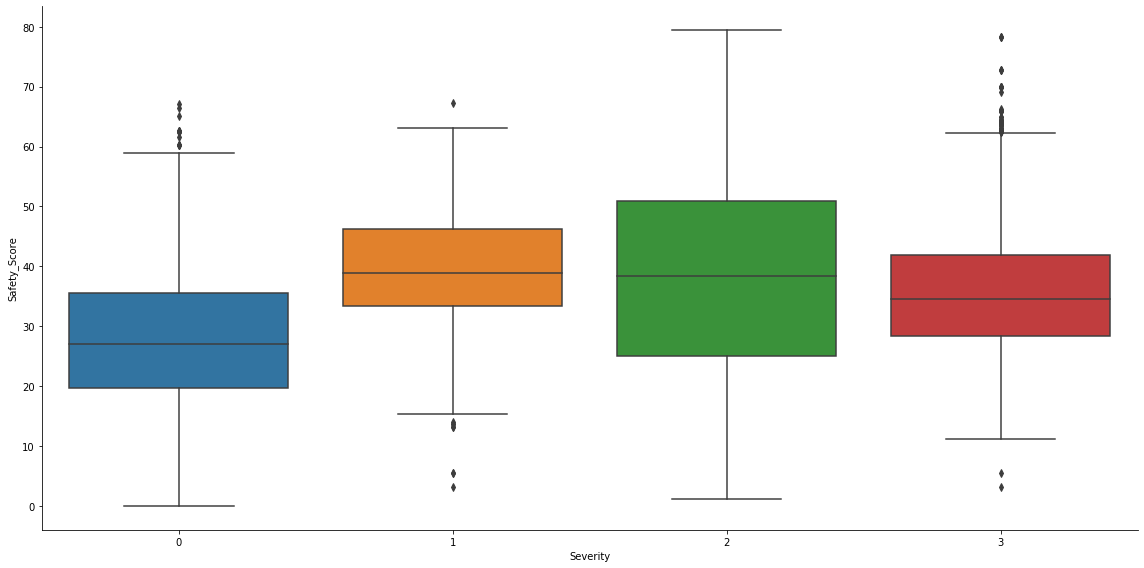

In [125]:
sns.catplot(x='Severity',y='Safety_Score',data=train,kind="box",height=8,aspect=2)

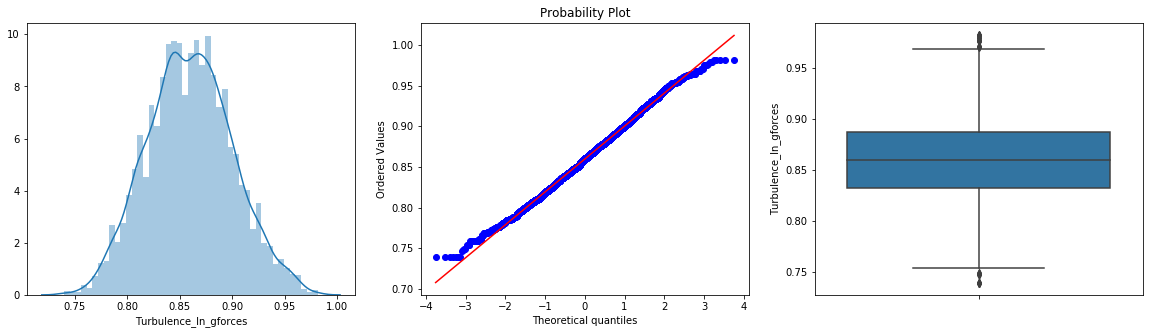

In [126]:
exponential_master(train,'Turbulence_In_gforces',0.15)

In [127]:
train['Turbulence_In_gforces'] = train['Turbulence_In_gforces']**0.15
test['Turbulence_In_gforces'] = test['Turbulence_In_gforces']**0.15

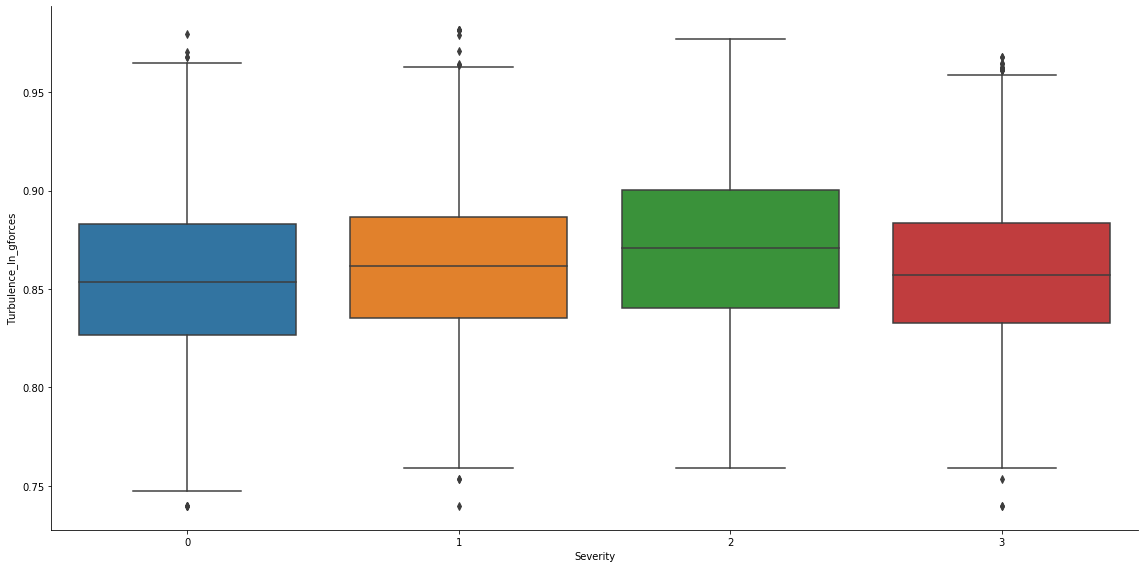

In [128]:
sns.catplot(x='Severity',y='Turbulence_In_gforces',data=train,kind="box",height=8,aspect=2)

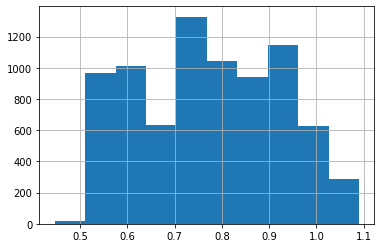

In [132]:
train['Adverse_Weather_Metric'].hist()

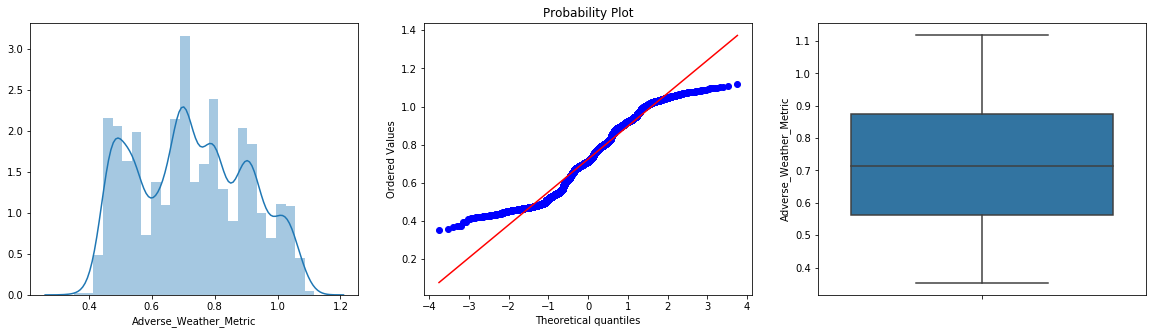

In [139]:
exponential_master(train,'Adverse_Weather_Metric',1.29)

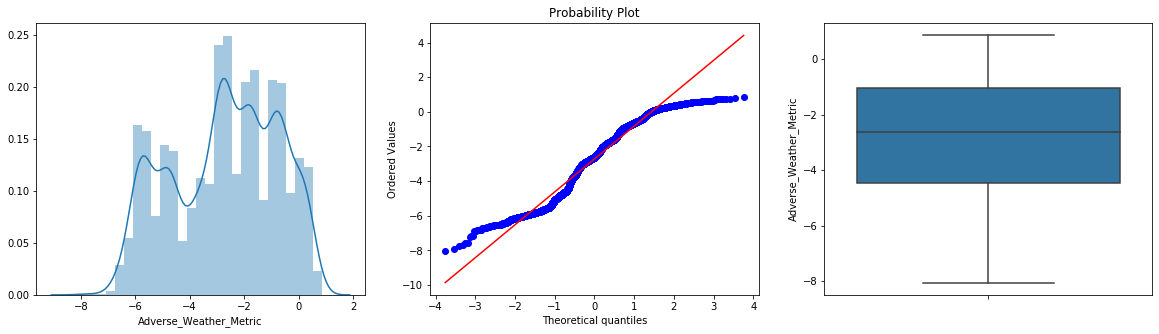

In [92]:
log_master(train,'Adverse_Weather_Metric')

In [140]:
train['Adverse_Weather_Metric'] = train['Adverse_Weather_Metric']**1.29
test['Adverse_Weather_Metric'] = test['Adverse_Weather_Metric']**1.29

In [141]:
float_array = train['Max_Elevation'].values.astype(float).reshape(-1,1)

In [142]:
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)

In [143]:
train['Max_Elevation'] = pd.DataFrame(scaled_array)

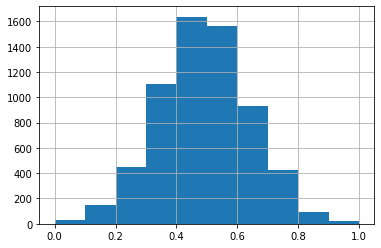

In [144]:
train['Max_Elevation'].hist()

In [145]:
float_array = test['Max_Elevation'].values.astype(float).reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
test['Max_Elevation'] = pd.DataFrame(scaled_array)

In [148]:
train.corr()['Severity']

Severity                   1.000000
Safety_Score               0.208240
Days_Since_Inspection      0.000976
Total_Safety_Complaints    0.015008
Control_Metric            -0.005544
Turbulence_In_gforces      0.044695
Cabin_Temperature         -0.012388
Accident_Type_Code         0.211894
Max_Elevation              0.007589
Violations                 0.018421
Adverse_Weather_Metric    -0.200157
Accident_ID               -0.013631
Name: Severity, dtype: float64

In [149]:
train.drop('Total_Safety_Complaints',axis=1,inplace=True)
test.drop('Total_Safety_Complaints',axis=1,inplace=True)

In [150]:
train.drop('Cabin_Temperature',axis=1,inplace=True)
test.drop('Cabin_Temperature',axis=1,inplace=True)

In [158]:
train.drop('Max_Elevation',axis=1,inplace=True)
test.drop('Max_Elevation',axis=1,inplace=True)

In [159]:
X_train = train.drop(['Severity'], axis=1)
Y_train = train.loc[:, ['Severity']]
X_test = test.drop(['Severity'], axis=1)
Y_test = test.loc[:, ['Severity']]

In [160]:
X_train

,Safety_Score,Days_Since_Inspection,Control_Metric,Turbulence_In_gforces,Accident_Type_Code,Violations,Adverse_Weather_Metric
7389,25.893598,19,57.839562,0.884726,5,1,0.614665
9275,39.545828,11,76.754786,0.805842,6,2,0.533524
2995,26.405050,12,69.234275,0.847415,4,1,0.664014
5316,29.390577,11,52.324521,0.876842,4,2,0.684344
356,55.585758,8,45.396536,0.865621,7,2,0.451528
49,27.754265,15,72.333637,0.884834,1,2,1.052269
7931,37.792222,11,69.917958,0.879552,3,2,0.772677
1523,42.257696,13,58.979034,0.844342,2,2,0.829316
7552,21.043380,18,61.212397,0.865253,3,4,0.770575
496,24.465995,13,52.780310,0.885375,1,3,1.073728


In [161]:
Y_train

,Severity
7389,1
9275,3
2995,0
5316,2
356,3
49,3
7931,3
1523,1
7552,3
496,0


In [162]:
test

,Severity,Safety_Score,Days_Since_Inspection,Control_Metric,Turbulence_In_gforces,Accident_Type_Code,Violations,Adverse_Weather_Metric
9394,0,26.295497,12,62.853236,0.839903,1,2,1.026867
898,3,44.036798,9,62.807657,0.826041,3,3,0.826774
2398,1,40.724514,13,53.965360,0.881775,2,0,0.920179
5906,3,34.919858,12,70.191431,0.874199,3,3,0.789539
2343,0,31.203104,11,67.319964,0.796732,4,2,0.715292
8225,3,16.170474,19,64.539654,0.851236,3,0,0.824301
5506,3,42.043941,10,65.998177,0.865498,3,0,0.729624
6451,3,44.036798,9,75.706472,0.861774,3,1,0.790369
2670,1,26.039781,16,45.897903,0.916143,6,3,0.537426
3497,0,13.157287,17,61.257976,0.808753,7,2,0.473371


In [163]:
tree = DecisionTreeClassifier(max_depth=3)

In [164]:
tree.fit(X_train,Y_train)
t = tree.predict(X_test)

In [165]:
print(classification_report(Y_test, t, labels=[0,1,2,3]))

              precision    recall  f1-score   support

           0       0.59      0.66      0.63       620
           1       0.60      0.51      0.55       493
           2       0.64      0.52      0.57       312
           3       0.45      0.50      0.47       575

    accuracy                           0.56      2000
   macro avg       0.57      0.55      0.56      2000
weighted avg       0.56      0.56      0.56      2000



In [168]:
forest = RandomForestClassifier()
forest.fit(X_train,Y_train)
f = forest.predict(X_test)

In [169]:
print(classification_report(Y_test, f, labels=[0,1,2,3]))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       620
           1       0.87      0.92      0.89       493
           2       0.90      0.88      0.89       312
           3       0.93      0.89      0.91       575

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



In [170]:
accuracy_score(Y_test,f)

0.9035

In [171]:
# 90.35% accuracy